# REGEX PROJECT
**Flipkart_ Ratings Review**

Team Members:

1. Sanjay Dey
2. Sanskar Pareek
3. Sakshi Chavan
4. Yashika Verma
5. Bhanavi Singh

In [1]:
# First, let's import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving Flipkart_ratings.csv to Flipkart_ratings.csv


In [3]:
# Read the csv file for analysis
df = pd.read_csv('Flipkart_ratings.csv')
df.head()

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,1,N,Y,One Star,garbage,31-08-2015
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015
2,US,46165193,R8R09HXXQHIWN,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,1,0,0,N,Y,One Star,Setup way to complicated for the average user.,30-08-2015
3,US,31009192,R19JT1LFVNATBG,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,5,0,0,N,N,We love the camera but had a lot of difficulty...,We purchased a Foscam about 6 months ago. We l...,30-08-2015
4,US,52865176,R2SCARC7V2J64P,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,2,0,0,N,N,Saved Grandma but camera died after 2 yrs,Worked for 2 yrs as a 'granny cam' and saved h...,29-08-2015


### Getting general information about our dataset

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4652 entries, 0 to 4651
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   marketplace        4652 non-null   object
 1   customer_id        4652 non-null   int64 
 2   review_id          4652 non-null   object
 3   product_title      4652 non-null   object
 4   product_category   4652 non-null   object
 5   star_rating        4652 non-null   int64 
 6   helpful_votes      4652 non-null   int64 
 7   total_votes        4652 non-null   int64 
 8   vine               4652 non-null   object
 9   verified_purchase  4652 non-null   object
 10  review_headline    4652 non-null   object
 11  review_body        4652 non-null   object
 12  review_date        4652 non-null   object
dtypes: int64(4), object(9)
memory usage: 472.6+ KB


In [5]:
df.describe()

,customer_id,star_rating,helpful_votes,total_votes
count,4.652000e+03,4652.000000,4652.000000,4652.000000
mean,3.042493e+07,4.008169,1.767627,2.535039
std,1.459990e+07,1.390115,44.011555,46.952126
min,3.810300e+04,1.000000,0.000000,0.000000
25%,1.659627e+07,4.000000,0.000000,0.000000
50%,3.035087e+07,5.000000,0.000000,0.000000
75%,4.409701e+07,5.000000,0.000000,1.000000
max,5.309641e+07,5.000000,2131.000000,2269.000000


In [6]:
df.shape

(4652, 13)

In [7]:
# Check if there are any null values or not
df.isnull().sum()

marketplace          0
customer_id          0
review_id            0
product_title        0
product_category     0
star_rating          0
helpful_votes        0
total_votes          0
vine                 0
verified_purchase    0
review_headline      0
review_body          0
review_date          0
dtype: int64

In [8]:
# Check if there are any duplicate entries or not
df.duplicated().sum()

0

In [9]:
df['product_title'].nunique()

1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


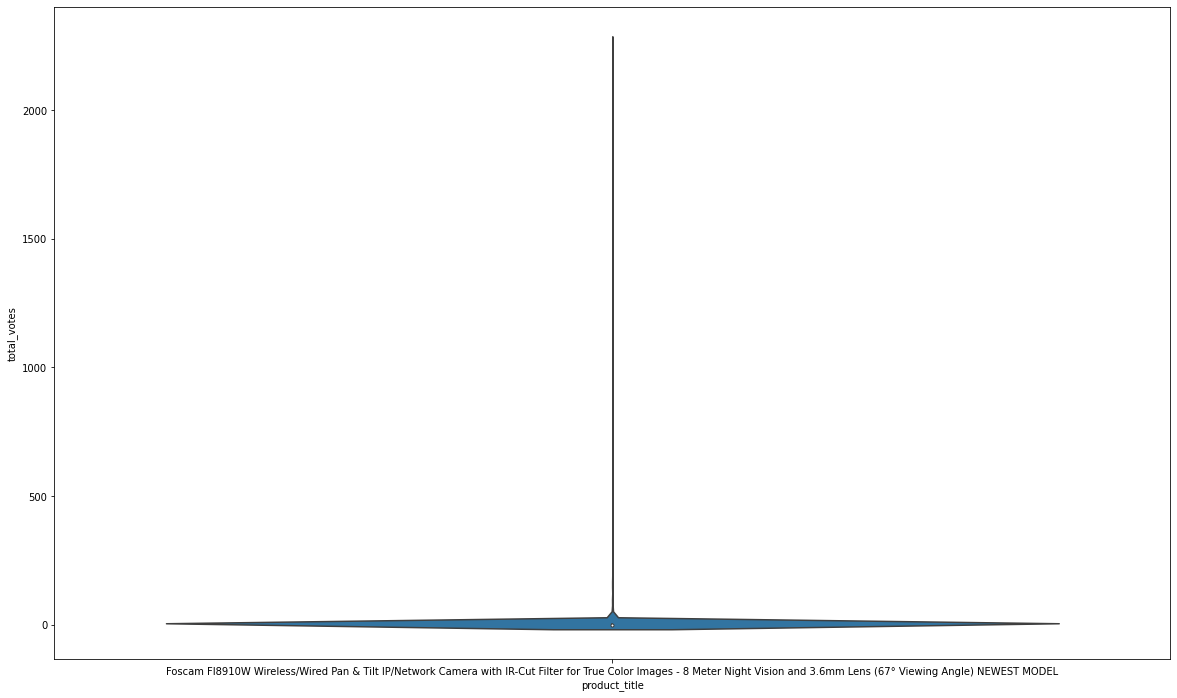

In [10]:
# A Violin Plot is used to visualise the distribution of the data and its probability density.Here,this plot shows total votes
#  count based on product title 
plt.figure(figsize=(20,12))
sns.violinplot(df['product_title'],df['total_votes'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


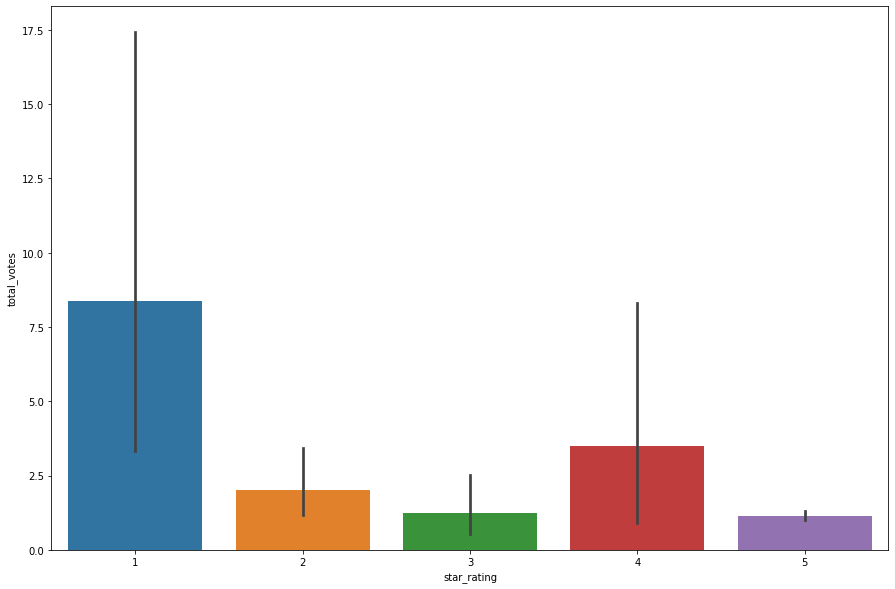

In [11]:
# This plot shows count of total votes based on star rating
plt.figure(figsize=(15,10))
sns.barplot(df['star_rating'],df['total_votes'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


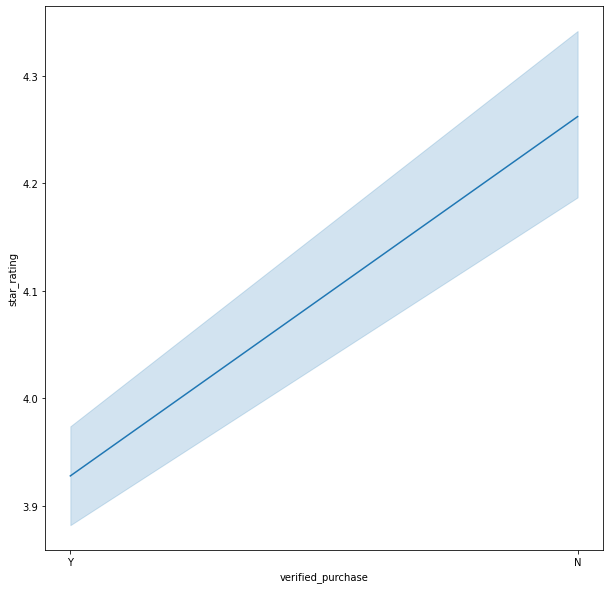

In [12]:
plt.figure(figsize=(10,10))
sns.lineplot(df['verified_purchase'],df['star_rating'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


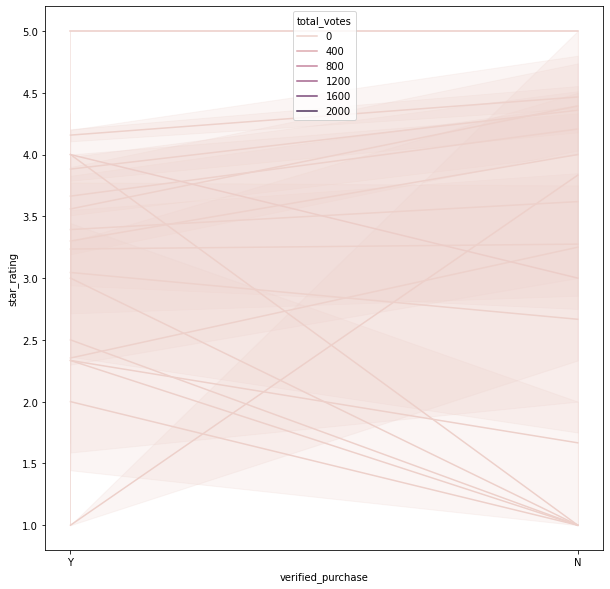

In [13]:
# In lineplot() Draw a line plot with the possibility of several semantic groupings. 
# These parameters control what visual semantics are used to identify the different subsets.¶
# In this plot we have plotted verified purchase VS star rating plot based on total votes
plt.figure(figsize=(10,10))
sns.lineplot(df['verified_purchase'],df['star_rating'],hue=df['total_votes'],data=df)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


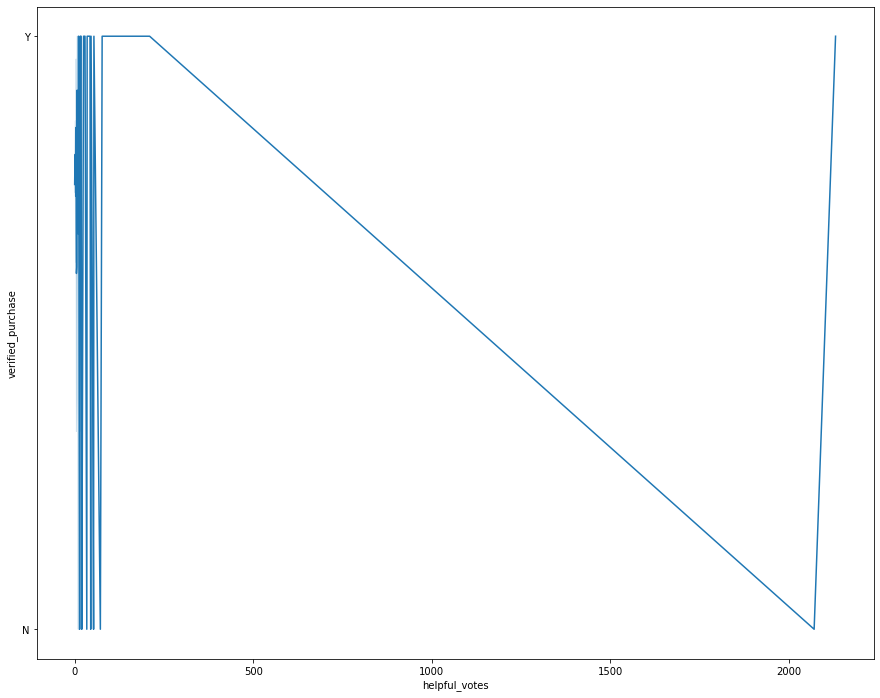

In [14]:
# This plot shows verfifed purchase graph based on helpful votes which we got from customer
plt.figure(figsize=(15,12))
sns.lineplot(df['helpful_votes'],df['verified_purchase'],data=df)

In [15]:
df['Sentiment'] = [1 if x > 3 else 0 for x in df.star_rating]  #0-negative 1-positive

In [16]:
df['Sentiment']

0       0
1       0
2       0
3       1
4       0
       ..
4647    0
4648    1
4649    1
4650    1
4651    0
Name: Sentiment, Length: 4652, dtype: int64

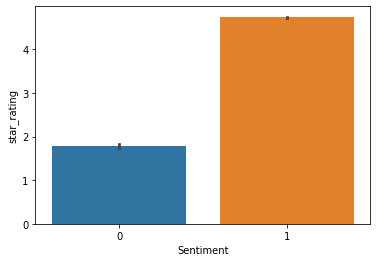

In [17]:
# Sentiment VS star rating plot
sns.barplot(x=df['Sentiment'],y=df['star_rating'])

In [18]:

import re
import nltk

nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [19]:
corpus=[]

for i in range(0, 4652):
  review = re.sub('[^a-zA-Z]', ' ', df['review_headline'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in set(all_stopwords)]
  review = ' '.join(review)
  corpus.append(review)

In [20]:

corpus

['one star',
 'work advertis',
 'one star',
 'love camera lot difficulti set',
 'save grandma camera die yr',
 'get pay',
 'complet total unreli',
 'three star',
 'not camera smart easiest setup could',
 'four star',
 'wake kid night loud click awar',
 'not simpl instal',
 'great product servic',
 'great babi monitor',
 'buy newer model want list function',
 'work',
 'five star',
 'great work',
 'good product',
 'simpli amaz',
 'set pain link camera',
 'outstand devic servic',
 'major flaw sensor',
 'carl great help set',
 'need littl tech support',
 'awesom',
 'not window',
 'high end hardwar low end softwar interfac exposur unknown third parti',
 'set internet connect not easi follow direct close work',
 'far good',
 'five star',
 'fairli decent netowrk camera',
 'oustand camera custom servic',
 'final set work great foscam screen share comput',
 'not buy',
 'bad choic problem tenvi',
 'good cam',
 'disappoint',
 'foscam wifi camera babi monitor',
 'two star',
 'product great job dif

Data Transformation

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 2328820)

In [22]:

X = cv.fit_transform(corpus).toarray()
y = df['Sentiment'].values

In [23]:
import pickle
bow_path = open('c1_BoW_Sentiment_Model.pkl','wb')
pickle.dump(cv, bow_path)

In [24]:
from google.colab import files
files.download('c1_BoW_Sentiment_Model.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

MODEL FITTING NAIVE BAYES

In [26]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [27]:
import joblib
path  = open('c2_Classifier_sentiment_Model','wb')
joblib.dump(classifier, path)

In [28]:
from google.colab import files
files.download('c2_Classifier_sentiment_Model')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

MODEL PERFORMANCE

In [30]:
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(classification_report(y_test,y_pred))
accuracy_score(y_test, y_pred)

[[215  25]
 [570 121]]
              precision    recall  f1-score   support

           0       0.27      0.90      0.42       240
           1       0.83      0.18      0.29       691

    accuracy                           0.36       931
   macro avg       0.55      0.54      0.35       931
weighted avg       0.69      0.36      0.32       931



0.3609022556390977

In [29]:
from sklearn.metrics import classification_report
y_pred_train = classifier.predict(X_train)
print(classification_report(y_train,y_pred_train))

              precision    recall  f1-score   support

           0       0.30      1.00      0.46       905
           1       1.00      0.26      0.41      2816

    accuracy                           0.44      3721
   macro avg       0.65      0.63      0.44      3721
weighted avg       0.83      0.44      0.42      3721



In [ ]:
classifier.predict_proba[:,1]

## Final Approach

In [31]:
review = df['review_headline']

In [32]:
import nltk

In [33]:
from nltk.corpus import stopwords 
#Stopwords are the English words which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence.
from nltk.stem import SnowballStemmer
#It is a stemming algorithm.stemming is reducing a word to its base word or stem in such a way that the words of similar kind lie under a common stem.
stop_words = stopwords.words('english')

In [34]:
snow = SnowballStemmer('english') #the stemmer requires a language parameter

In [35]:
pip install emoji

     |████████████████████████████████| 170 kB 5.3 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=23ba6ccf41d9b6188c9d275607949cae80739c3d0353a09c503b75406fde2dd1
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
Successfully built emoji


In [36]:
import emoji
import re
from nltk.tokenize import word_tokenize

In [37]:
review = [re.sub("!","",txt) for txt in review] # used to replace occurrences of special characters with white space  .
emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
def give_emoji_free_text(comm): # function to remove emojis from reviews
    allchars = [str for str in comm]
    emoji_list = [c for c in allchars if c in emoji.UNICODE_EMOJI]
    clean_text = ' '.join([str for str in comm.split() if not any(i in str for i in emoji_list)])
    return clean_text

review = [give_emoji_free_text(txt) for txt in review]
review = [give_emoji_free_text(txt) for txt in review]
#from all reviews , readmore, -,\d is replaced with space. 
review = [re.sub("READ MORE|READ MOR|READ MO","",i) for i in review]
review = [re.sub('-','',i) for i in review]
review = [re.sub('\d','',i) for i in review]

In [38]:
text =[]
setstop = ['money','purchase','penny','market','product','every']
stopw = (stopwords.words('english'))
stopw.extend(setstop) # extending the stop words list by adding setstop
stopw = set(stopw)

for message in review:
    message = message.lower().strip() # converting review to lower case and also removing both leading and trailing characters.
    words = [snow.stem(word) for word in message.split() if word not in stopw] #checking that if stop words are present in message, if word not in stopwords we will just stem it.
    text.append(' '.join(words)) #it will create a new list of all the above stemmed words.

In [39]:
import nltk
nltk.download('punkt')
#This tokenizer divides a text into a list of sentences, by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [40]:
v= []
for val in text:
    val = str(val)
    tokens = val.split() #spliting all words in text
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower() # converting each word into lower case
    v.append(" ".join(tokens)) # creating a new list v with all lower case tokens
for word in range(len(v)):
    token = word_tokenize(v[word]) #for splitting strings into tokens (nominally words). It splits tokens based on white space and punctuation.
    for tkn in token:
        if tkn in stopw:# checking if any stopwords present if present we will remove it.
            token.remove(tkn)
    v[word] = " ".join([str(ele) for ele in token]) 

In [41]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
#Convert a collection of text documents to a matrix of token counts.
#Convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [42]:
count_vect = CountVectorizer(max_features=5000) #Initialize a CountVectorizer object: count_vectorizer
bow_data = count_vect.fit_transform(v).toarray() #Transforms the data into a bag of words

In [43]:
count_vect.get_feature_names()[:10]

['abil',
 'abl',
 'able',
 'absolut',
 'abus',
 'accept',
 'access',
 'accident',
 'accord',
 'account']

In [44]:
tf_idf = TfidfVectorizer() #initialise tfid object
tf_data = tf_idf.fit_transform(v).toarray()
tf_data.shape

(4652, 1702)

In [45]:
z = []
import random
for i in range(len(v)):
    c = random.randint(0,1) # taking a raandom number between 0-1
    z.append(c) #appending it in z
df['Score'] = z
y = df['Score']

In [46]:
x_train,x_test,y_train,y_test = train_test_split(tf_data,y) # splitting data into train and test 

In [47]:
x_train.shape

(3489, 1702)

In [48]:
y_test.shape

(1163,)

In [49]:
lr = LogisticRegression(class_weight='balanced') # intialize a logistic regression function
lr.fit(x_train,y_train) # fitting x_train and y-train data in model
y_pred = lr.predict(x_test) #predicting the results with x-test

In [50]:
accuracy_score(y_test,y_pred)

0.5339638865004299

In [51]:
accuracy_score(y_train,lr.predict(x_train))

0.6807108053883635

In [52]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[307, 254],
       [288, 314]])

# Trying Textblob

In [53]:
from textblob import TextBlob
#TextBlob is a Python  library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more.

from textblob import TextBlob
score = []
for i in range(len(v)):
    bl = TextBlob(v[i])
    score.append(bl.sentiment.polarity) # sentiment polarity score which tells if the sentiment is positive or negative

In [54]:
for i in range(len(score)):
    if score[i] < 0.0: #negative score
        score[i] = 0
    elif score[i] > 0.0:#positive score
        score[i] = 1
    elif score[i] == 0.0: #neutral
        score[i] = 0

In [55]:
df['Score'] = score

In [56]:
df['Score'].value_counts()

0    2660
1    1992
Name: Score, dtype: int64

In [57]:
df.review_headline = v
vect = TfidfVectorizer() #intialising tfid object
X=vect.fit_transform(df.review_headline).toarray() 

X_df = pd.DataFrame(X,columns = vect.get_feature_names())#creating a dataframe with X rows and columns present in vect

In [58]:
y = df['Score']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_df,y,test_size=0.7,random_state=123,stratify=y) #splitting data into train and test sets
log_reg = LogisticRegression(penalty='l2',C=1.0).fit(X_train,y_train) #applying logistic regression to predict score.
print("Trainig set:",log_reg.score(X_train,y_train))
print("Testing set:",log_reg.score(X_test,y_test))

Trainig set: 0.956989247311828
Testing set: 0.9361375498925392


In [60]:
y_pred = log_reg.predict(X_test) #predicting for X-test data

In [61]:
accuracy_score(y_test,y_pred)

0.9361375498925392

In [62]:
accuracy_score(y_train,log_reg.predict(X_train))

0.956989247311828

In [63]:
cm = confusion_matrix(y_test,y_pred) # creating confusion matrix
cm

array([[1856,    6],
       [ 202, 1193]])